THE SPARK FOUNDATION: DATA SCIENCE ABD BUSNIESS ANALYTICS

task 1: Prediction using supervised ML.

In [86]:
import pandas as pd
import numpy as np
d=pd.read_csv("t1.csv")


In [90]:
d.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [94]:
d.shape

(25, 2)

In [98]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [103]:
d.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


training and testing the dataset

In [107]:
X = d.iloc[:, :-1].values
y= d.iloc[:, 1].values

In [111]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 0)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

Text(0.5, 1.0, 'Distribution of Scores')

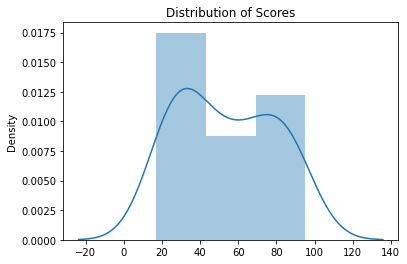

In [114]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.distplot(y_train, kde=True)
plt.title('Distribution of Scores')

Text(0.5, 1.0, 'Hours VS Scores')

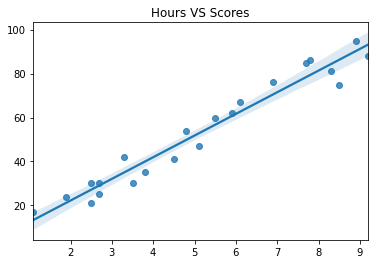

In [117]:
sns.regplot(x_train, y_train)
plt.title('Hours VS Scores')

model development

In [120]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [122]:
y_pred = regressor.predict(x_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


Vzualising training and tested data set

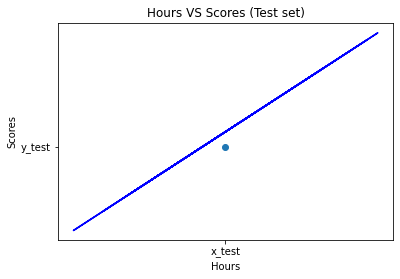

In [123]:
plt.scatter("x_test","y_test",)
plt.plot(X_train,  regressor.predict(X_train), color= 'blue')
plt.title('Hours VS Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

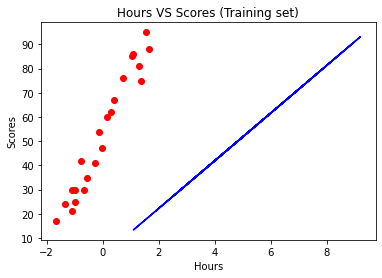

In [125]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(x_train,  regressor.predict(x_train), color= 'blue')
plt.title('Hours VS Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Model Ealuation

In [126]:
k = X_test.shape[1]
n = len(X_test)
n

3

In [127]:
from sklearn.metrics import r2_score
from math import sqrt

r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('R2 =', r2, '\nAdjusted R2 =', adj_r2) 

R2 = 0.9298077534821835 
Adjusted R2 = 0.859615506964367


predicting future data

In [128]:
Hours = 9.25
my_pred = regressor.predict([[Hours]])

print('Hours =', Hours, '\nPrediction =', my_pred) 

Hours = 9.25 
Prediction = [93.67656425]
